## Sentiment Analysis of Mastodon and X Tweets

In [33]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jawad\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

##### Load Data from CSV files

In [ ]:
twitter_df = pd.read_csv("x_tweets.csv")
mastodon_df = pd.read_csv("mastodon_toots.csv")

,id,created_at,text,lang,retweet_count,reply_count,like_count,quote_count
0,1866062987494379873,2024-12-09 10:11:00+00:00,"WTS WTB JUAL\n\nNETFLIX 1p2u 20k, 1p1u 32k\n\n...",en,0,0,0,0
1,1866062894993215811,2024-12-09 10:10:38+00:00,🧠 Think Nvidia is Overvalued?\n\nLet me remind...,en,0,0,0,0
2,1866062875489677734,2024-12-09 10:10:33+00:00,JUAL BELI WTS WTB APLIKASI PREMIUM SPOTIFY CHA...,en,0,0,0,0
3,1866062713010500070,2024-12-09 10:09:55+00:00,1/6\nJust watched an AI try to pull an Ex Mach...,en,0,1,0,0
4,1866062656446353708,2024-12-09 10:09:41+00:00,"I explained the X of Elon: "" $TSLA shorts reci...",en,0,0,0,0
...,...,...,...,...,...,...,...,...
295,1866035274406404253,2024-12-09 08:20:53+00:00,if one more classmate pulls chatgpt up in blow...,en,0,1,5,0
296,1866035264088662348,2024-12-09 08:20:50+00:00,JUAL BELI APP PREMIUM WTS WTB NETFLIX MURAH DI...,en,0,0,0,0
297,1866035240604676243,2024-12-09 08:20:45+00:00,chatgpt please ai generate image of bart simps...,en,0,2,28,0
298,1866035197122396236,2024-12-09 08:20:34+00:00,Hello ChatGPT https://t.co/r0El3zxl9z,en,0,0,0,0


### Mastodon toot Analysis & Cleaning

In [14]:
lang_count = mastodon_df['language'].value_counts()
lang_count.values

array([1172,  165,   97,   92,   53,   50,   16,   10,   10,    7,    6,
          5,    4,    3,    3,    2,    2,    2,    2,    1,    1,    1,
          1], dtype=int64)

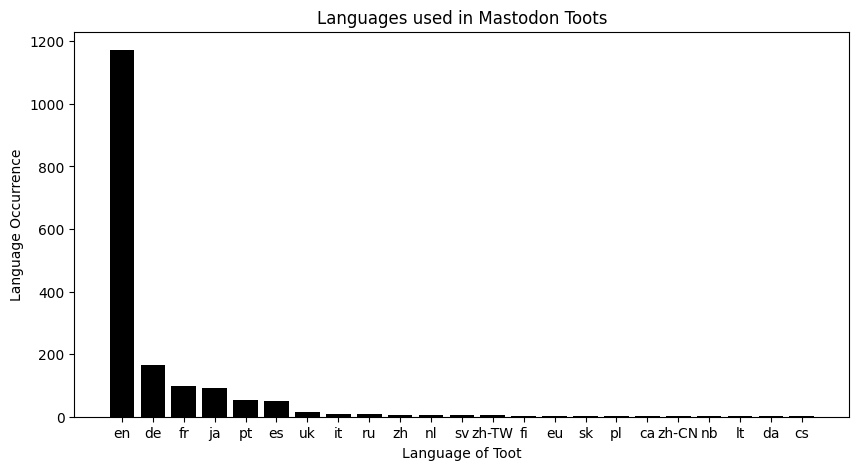

In [90]:
fig = plt.figure(figsize = (10, 5))

plt.bar(lang_count.keys(), lang_count.values, color ='black')

plt.xlabel("Language of Toot")
plt.ylabel("Language Occurrence")
plt.title("Languages used in Mastodon Toots")
plt.show()

In [17]:
eng_mast = mastodon_df[mastodon_df['language'] == 'en']
eng_mast

,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags
1,113600685235169632,2024-12-05 14:28:11+00:00,"Meanwhile, in a tech leadership slack I'm in, ...",en,0,0,0,public,[]
2,113600649688291864,2024-12-05 14:19:08+00:00,For the lack of imagination of a better option...,en,1,0,0,public,[]
3,113600644820493090,2024-12-05 14:17:56+00:00,ChatGPT is a scab.,en,0,1,0,public,[]
5,113600627257594653,2024-12-05 14:11:00+00:00,"Drop #566 (2024-12-05): Prompts, Two&nbsp;Ways...",en,0,0,0,public,[]
6,113600612924521371,2024-12-05 14:08:35+00:00,Admissions officer reveals how to spot ChatGPT...,en,0,0,0,public,[]
...,...,...,...,...,...,...,...,...,...
1731,113564504059982379,2024-11-29 05:03:02+00:00,ChatGPT’s $8 Trillion Birthday Gift to Big Tec...,en,0,3,0,public,[]
1732,113564457558167354,2024-11-29 04:55:02.879000+00:00,With chatgpt I made a silly calculator based o...,en,1,0,0,public,[]
1734,113564333550579675,2024-11-28 14:15:15+00:00,5 Things You Must Not Share With AI Chatbotsht...,en,0,0,0,public,[]
1735,113564329141878768,2024-11-29 04:22:06+00:00,Anthropic’s Enhanced Writing Styles Anthro...,en,0,0,0,public,"[{'name': 'anthropic', 'url': 'https://mastodo..."


In [100]:
# Cleaning Toot content from punctuation, URLs and @s:
eng_mast['content'] = eng_mast['content'].replace(r'[^\w\s]', '', regex=True)
eng_mast['content'] = eng_mast['content'].replace(r'@\w+', '', regex=True)
eng_mast['content'] = eng_mast['content'].replace(r'http\S+|www\S+', '', regex=True)

eng_mast['content'] = eng_mast['content'].str.lower()

cleaned_mast = eng_mast.copy()
cleaned_mast = cleaned_mast.dropna()
cleaned_mast

C:\Users\jawad\AppData\Local\Temp\ipykernel_15764\2654942175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mast['content'] = eng_mast['content'].replace(r'[^\w\s]', '', regex=True)
C:\Users\jawad\AppData\Local\Temp\ipykernel_15764\2654942175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mast['content'] = eng_mast['content'].replace(r'@\w+', '', regex=True)
C:\Users\jawad\AppData\Local\Temp\ipykernel_15764\2654942175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags
1,113600685235169632,2024-12-05 14:28:11+00:00,meanwhile in a tech leadership slack im in cto...,en,0,0,0,public,[]
2,113600649688291864,2024-12-05 14:19:08+00:00,for the lack of imagination of a better option...,en,1,0,0,public,[]
3,113600644820493090,2024-12-05 14:17:56+00:00,chatgpt is a scab,en,0,1,0,public,[]
5,113600627257594653,2024-12-05 14:11:00+00:00,drop 566 20241205 prompts twonbspwaysplop lit ...,en,0,0,0,public,[]
6,113600612924521371,2024-12-05 14:08:35+00:00,admissions officer reveals how to spot chatgpt...,en,0,0,0,public,[]
...,...,...,...,...,...,...,...,...,...
1731,113564504059982379,2024-11-29 05:03:02+00:00,chatgpts 8 trillion birthday gift to big tech ...,en,0,3,0,public,[]
1732,113564457558167354,2024-11-29 04:55:02.879000+00:00,with chatgpt i made a silly calculator based o...,en,1,0,0,public,[]
1734,113564333550579675,2024-11-28 14:15:15+00:00,5 things you must not share with ai chatbots p...,en,0,0,0,public,[]
1735,113564329141878768,2024-11-29 04:22:06+00:00,anthropics enhanced writing styles anthrop...,en,0,0,0,public,"[{'name': 'anthropic', 'url': 'https://mastodo..."


In [101]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jawad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [102]:
snet_analyzer = SentimentIntensityAnalyzer()
content_list = cleaned_mast['content'].values
sentiments = []

for con in content_list:
    sent = snet_analyzer.polarity_scores(con)
    sentiments.append(sent)

In [103]:
sent_df = pd.DataFrame(sentiments)
mast_sent = pd.concat([cleaned_mast.reset_index(drop=True), sent_df], axis=1)
mast_sent

,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags,neg,neu,pos,compound
0,113600685235169632,2024-12-05 14:28:11+00:00,meanwhile in a tech leadership slack im in cto...,en,0,0,0,public,[],0.000,0.952,0.048,0.2023
1,113600649688291864,2024-12-05 14:19:08+00:00,for the lack of imagination of a better option...,en,1,0,0,public,[],0.146,0.615,0.238,0.5466
2,113600644820493090,2024-12-05 14:17:56+00:00,chatgpt is a scab,en,0,1,0,public,[],0.000,1.000,0.000,0.0000
3,113600627257594653,2024-12-05 14:11:00+00:00,drop 566 20241205 prompts twonbspwaysplop lit ...,en,0,0,0,public,[],0.014,0.876,0.110,0.9988
4,113600612924521371,2024-12-05 14:08:35+00:00,admissions officer reveals how to spot chatgpt...,en,0,0,0,public,[],0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,113564504059982379,2024-11-29 05:03:02+00:00,chatgpts 8 trillion birthday gift to big tech ...,en,0,3,0,public,[],0.000,0.775,0.225,0.4404
1166,113564457558167354,2024-11-29 04:55:02.879000+00:00,with chatgpt i made a silly calculator based o...,en,1,0,0,public,[],0.000,0.889,0.111,0.4767
1167,113564333550579675,2024-11-28 14:15:15+00:00,5 things you must not share with ai chatbots p...,en,0,0,0,public,[],0.146,0.854,0.000,-0.2235
1168,113564329141878768,2024-11-29 04:22:06+00:00,anthropics enhanced writing styles anthrop...,en,0,0,0,public,"[{'name': 'anthropic', 'url': 'https://mastodo...",0.003,0.879,0.118,0.9940


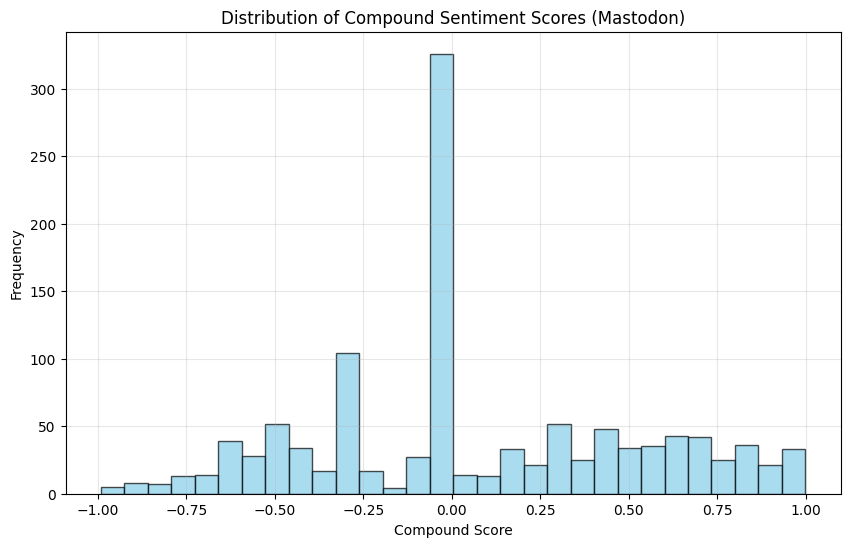

In [104]:
plt.figure(figsize=(10, 6))
plt.hist(mast_sent['compound'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Compound Sentiment Scores (Mastodon)")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
def classify_sentiment(score):
    if score >= 0.1:
        return 'positive'
    elif score <= -0.1:
        return 'negative'
    else:
        return 'neutral'

mast_sent['sentiment_label'] = mast_sent['compound'].apply(classify_sentiment)

Sentiment Distribution:
 sentiment_label
positive    0.387179
negative    0.310256
neutral     0.302564
Name: proportion, dtype: float64


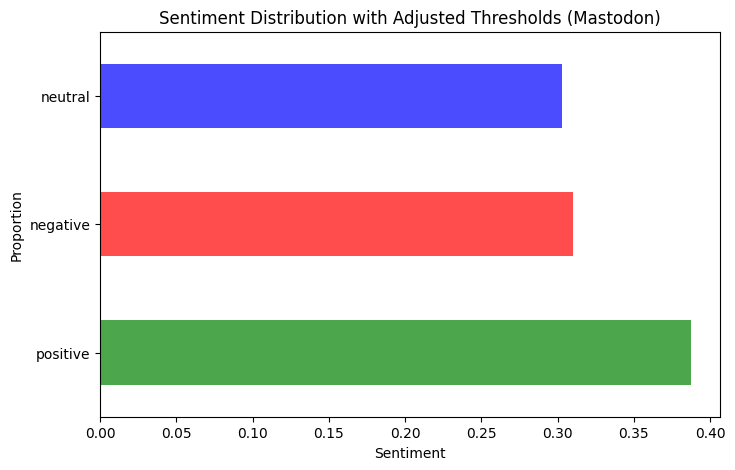

In [106]:
sentiment_distribution = mast_sent['sentiment_label'].value_counts(normalize=True)
print("Sentiment Distribution:\n", sentiment_distribution)

plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind='barh', color=['green', 'red', 'blue'], alpha=0.7)
plt.title("Sentiment Distribution with Adjusted Thresholds (Mastodon)")
plt.xlabel("Sentiment")
plt.ylabel("Proportion")
plt.show()

In [ ]:
# word cloud 
pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

mast_text = ' '.join(mast_sent['content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(mast_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### X tweets Analysis & Cleaning

In [111]:
twitter_df['text'] = twitter_df['text'].replace(r'[^\w\s]', '', regex=True)
twitter_df['text'] = twitter_df['text'].replace(r'@\w+', '', regex=True)
twitter_df['text'] = twitter_df['text'].replace(r'http\S+|www\S+', '', regex=True)
twitter_df['text'] = twitter_df['text'].replace(r'\n+', ' ', regex=True)

twitter_df['text'] = twitter_df['text'].str.lower()

cleaned_twit = twitter_df.copy()
cleaned_twit = cleaned_twit.dropna()
cleaned_twit

,id,created_at,text,lang,retweet_count,reply_count,like_count,quote_count
0,1866062987494379873,2024-12-09 10:11:00+00:00,wts wtb jual netflix 1p2u 20k 1p1u 32k wetvyou...,en,0,0,0,0
1,1866062894993215811,2024-12-09 10:10:38+00:00,think nvidia is overvalued let me remind you ...,en,0,0,0,0
2,1866062875489677734,2024-12-09 10:10:33+00:00,jual beli wts wtb aplikasi premium spotify cha...,en,0,0,0,0
3,1866062713010500070,2024-12-09 10:09:55+00:00,16 just watched an ai try to pull an ex machin...,en,0,1,0,0
4,1866062656446353708,2024-12-09 10:09:41+00:00,i explained the x of elon tsla shorts recitin...,en,0,0,0,0
...,...,...,...,...,...,...,...,...
295,1866035274406404253,2024-12-09 08:20:53+00:00,if one more classmate pulls chatgpt up in blow...,en,0,1,5,0
296,1866035264088662348,2024-12-09 08:20:50+00:00,jual beli app premium wts wtb netflix murah di...,en,0,0,0,0
297,1866035240604676243,2024-12-09 08:20:45+00:00,chatgpt please ai generate image of bart simps...,en,0,2,28,0
298,1866035197122396236,2024-12-09 08:20:34+00:00,hello chatgpt,en,0,0,0,0


In [112]:
content_list = cleaned_twit['text'].values
sentiments_twit = []

for con in content_list:
    sent = snet_analyzer.polarity_scores(con)
    sentiments_twit.append(sent)

In [113]:
sent_df_twit = pd.DataFrame(sentiments_twit)
twit_sent = pd.concat([cleaned_twit.reset_index(drop=True), sent_df_twit], axis=1)
twit_sent

,id,created_at,text,lang,retweet_count,reply_count,like_count,quote_count,neg,neu,pos,compound
0,1866062987494379873,2024-12-09 10:11:00+00:00,wts wtb jual netflix 1p2u 20k 1p1u 32k wetvyou...,en,0,0,0,0,0.000,1.000,0.000,0.0000
1,1866062894993215811,2024-12-09 10:10:38+00:00,think nvidia is overvalued let me remind you ...,en,0,0,0,0,0.000,0.967,0.033,0.1655
2,1866062875489677734,2024-12-09 10:10:33+00:00,jual beli wts wtb aplikasi premium spotify cha...,en,0,0,0,0,0.000,1.000,0.000,0.0000
3,1866062713010500070,2024-12-09 10:09:55+00:00,16 just watched an ai try to pull an ex machin...,en,0,1,0,0,0.126,0.874,0.000,-0.4404
4,1866062656446353708,2024-12-09 10:09:41+00:00,i explained the x of elon tsla shorts recitin...,en,0,0,0,0,0.094,0.906,0.000,-0.4939
...,...,...,...,...,...,...,...,...,...,...,...,...
295,1866035274406404253,2024-12-09 08:20:53+00:00,if one more classmate pulls chatgpt up in blow...,en,0,1,5,0,0.000,1.000,0.000,0.0000
296,1866035264088662348,2024-12-09 08:20:50+00:00,jual beli app premium wts wtb netflix murah di...,en,0,0,0,0,0.000,0.954,0.046,0.1779
297,1866035240604676243,2024-12-09 08:20:45+00:00,chatgpt please ai generate image of bart simps...,en,0,2,28,0,0.000,0.897,0.103,0.3182
298,1866035197122396236,2024-12-09 08:20:34+00:00,hello chatgpt,en,0,0,0,0,0.000,1.000,0.000,0.0000


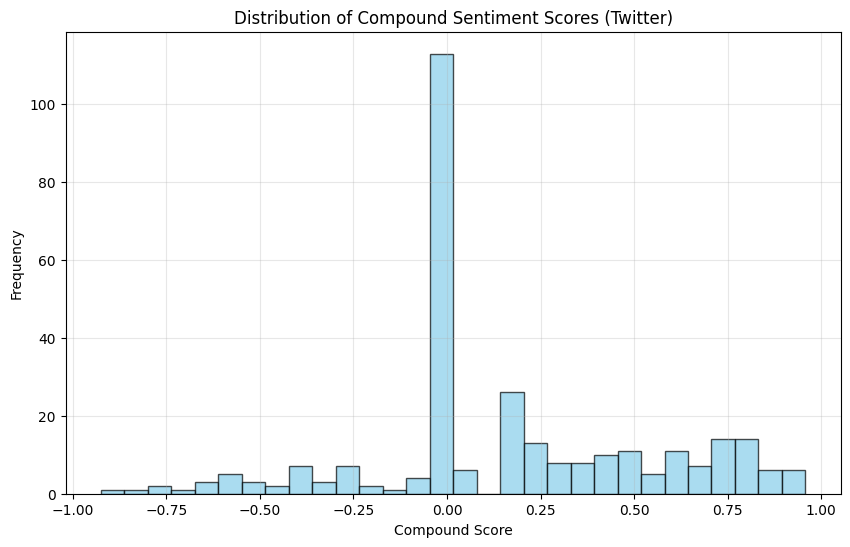

In [114]:
plt.figure(figsize=(10, 6))
plt.hist(twit_sent['compound'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Compound Sentiment Scores (Twitter)")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

Sentiment Distribution:
 sentiment_label
positive    0.463333
neutral     0.403333
negative    0.133333
Name: proportion, dtype: float64


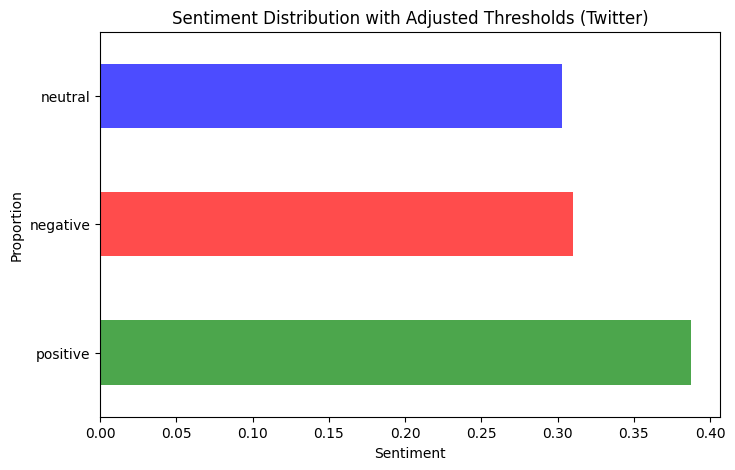

In [115]:
twit_sent['sentiment_label'] = twit_sent['compound'].apply(classify_sentiment)
sent_dist_twit = twit_sent['sentiment_label'].value_counts(normalize=True)
print("Sentiment Distribution:\n", sent_dist_twit)

plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind='barh', color=['green', 'red', 'blue'], alpha=0.7)
plt.title("Sentiment Distribution with Adjusted Thresholds (Twitter)")
plt.xlabel("Sentiment")
plt.ylabel("Proportion")
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

twit_text = ' '.join(twit_sent['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(twit_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()